## Text to Image Synthesis with LLMs & VLMs

Text to Image Synthesis with LLMs (Large Language Models) & VLMs (Vision-Language Models)

- **Datasets:** set of images from url
- **Models:** CLIP, BigGAN

In [3]:
# Step 1: Setup Environment
# Open a new Colab notebook and run the following cells

In [4]:
# Step 2: Install Dependencies
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.6 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-45b0oenb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-45b0oenb
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_

In [5]:
import torch
import numpy as np
import clip
from PIL import Image
import requests
from io import BytesIO

In [6]:
# Step 3: Load Pre-trained CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:36<00:00, 9.63MiB/s]


### Preprocessing

In [7]:
# Function to download and preprocess images
def download_and_preprocess(urls, preprocess):
    images = []
    for url in urls:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB") # CLIP expects images in RGB format
        images.append(preprocess(img).unsqueeze(0))
    return torch.cat(images)

### Load a set of candidate images

In [8]:
# Load a set of candidate images
# Examples: https://theluxurytravelexpert.com/2023/06/12/top-10-most-beautiful-waterfalls-world/
urls = [
    # test 1: Waterfall
    # "https://i0.wp.com/theluxurytravelexpert.com/wp-content/uploads/2014/11/havasu-falls-arizona-usa.jpg?resize=678%2C382&ssl=1",
    # "https://i0.wp.com/theluxurytravelexpert.com/wp-content/uploads/2014/11/plitvice-waterfalls-croatia.jpg?ssl=1",
    # "https://i0.wp.com/theluxurytravelexpert.com/wp-content/uploads/2014/11/kaieteur-falls-guyana.jpg?resize=678%2C382&ssl=1",
    # "https://i0.wp.com/theluxurytravelexpert.com/wp-content/uploads/2014/11/vicoria-falls-zimbabwe-zambia.jpg?resize=678%2C382&ssl=1",
    # test 2: animals => https://stock.adobe.com/fr/search?k=happy+dog&asset_id=692443053
    "https://t4.ftcdn.net/jpg/02/02/74/71/240_F_202747104_0RtpypsV8uIQnzffUN8syXaCJpdgiI4Z.jpg",
    "https://t3.ftcdn.net/jpg/02/98/80/68/240_F_298806801_EuKxQEhFwckJKPnX9B8hnjL06cbj6LpA.jpg",
    "https://as1.ftcdn.net/v2/jpg/03/90/12/30/1000_F_390123053_dLdh2YggDNrXYlGP9OgBGfTdIwUKU2Hx.jpg",
    "https://t3.ftcdn.net/jpg/03/22/04/88/240_F_322048853_DOj6xDy7Cpz98ZNi0I9UN708TZSqjt5m.jpg",
    "https://t4.ftcdn.net/jpg/00/97/58/97/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg",
    "https://as1.ftcdn.net/v2/jpg/06/92/44/30/1000_F_692443053_1keDl4r0mQq9IBoxvWqqq6hutc12Slw0.jpg",
    # Add more image URLs
]

""" Debug"""
# img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Shaki_waterfall.jpg/800px-Shaki_waterfall.jpg"
# img_url  = "https://i0.wp.com/theluxurytravelexpert.com/wp-content/uploads/2014/11/plitvice-waterfalls-croatia.jpg?ssl=1"
# response = requests.get(img_url)
# response.raise_for_status()
# img = Image.open(BytesIO(response.content))

# img


# Try using a different image loading library like OpenCV
# import cv2

# images = [cv2.imread(url) for url in urls]

# # Convert the images to PIL format
# images = [Image.fromarray(img) for img in images]

# # image_tensors = torch.stack([preprocess(img).to(device) for img in images])

# # image_tensors
"""End Debug """





'End Debug '

In [9]:
# Download and preprocess the images
image_tensors = download_and_preprocess(urls, preprocess).to(device)

# print(f"image_tensors-size: {image_tensors.size()}\nimage_tensors-types: {image_tensors.type()}")
# print(f"image_tensors-shape: {image_tensors.shape}\nimage_tensors: {image_tensors}")


# image_tensors

### Generate Images Based on Text Descriptions

In [12]:
"""
Use a set of pre-generated images and rank them based on the text prompt using CLIP
- change the text description to see different results
"""
# Define the text description
# text = "A photo of a futuristic city"
text = "A happy dog"
# text = "A cat"

# Encode the text and images using CLIP
text_tokens = clip.tokenize([text]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    image_features = model.encode_image(image_tensors)

# Calculate similarity between the text and images, and normalize scores across images: dim=0
similarity = (100.0 * image_features @ text_features.T).softmax(dim=0)

# Select the most similar image
most_similar_idx = similarity.argmax().item()
# best_image = images[most_similar_idx]

best_image = Image.open(BytesIO(requests.get(urls[most_similar_idx]).content))

""" Debug """
# print(f"text_tokens: {text_tokens.shape}\ntext_tokens: {text_tokens}")
# print(f"text_features: {text_features.shape}\ntext_features: {text_features}")
# print(f"text_features.T: {(text_features.T).shape}\ntext_features.T: {text_features.T}")


# print(f"image_tensors: {image_tensors.shape}\nimage_tensors: {image_tensors}")
# print(f"image_features: {image_features.shape}\nimage_features: {image_features}")


' Debug '

In [11]:
# Print out similarity scores for debugging
print(f"Similarity scores: {similarity.cpu().numpy().squeeze()}")

Similarity scores: [8.3e-07 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00]


### Output: visualization and analysis

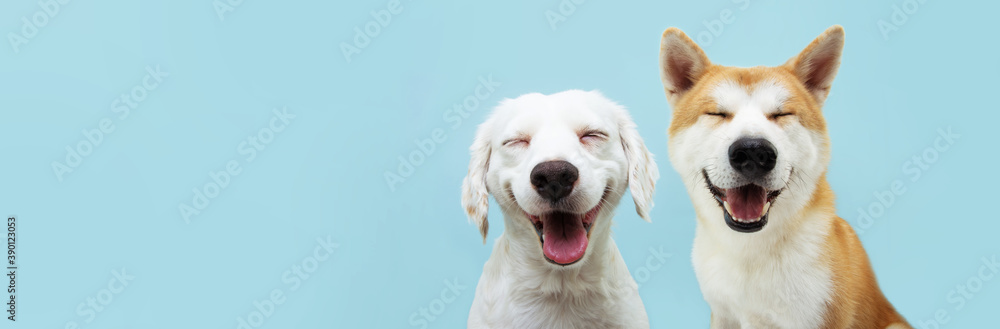

In [21]:
# Display the best matching image
# best_image.show()
display(best_image)

## References
- [Vision Language Models Explained - HuggingFace](https://huggingface.co/blog/vlms)
- [A Dive into Vision-Language Models - HuggingFace](https://huggingface.co/blog/vision_language_pretraining)

Tools

- [OpenVLM Leaderboard - HF](https://huggingface.co/spaces/opencompass/open_vlm_leaderboard)